### Лабораторная работа № 3 – Регрессионный анализ данных
##### Цель лабораторной работы – получение навыков работы с методами регрессии
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

Кодировка классификаторов:

1 – линейная регрессия без использования регуляризаторов; 

2 – линейная регрессия, LASSO регуляризатор;

3 – линейная регрессия, RIDGE регуляризатор;


##### Вариант 21
#### 6/1, 2

#### 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

1. mpg расход топлива
2. cylinders количество цилиндров  
3. displacement перемещение
4. horsepower л/с
5. weight масса
6. acceleration ускорение
7. model year год производства
8. origin происхождение 
9. car name название модели


In [149]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr


In [140]:
mpg_df = pd.read_csv('auto-mpg_data.txt', encoding = 'latin1')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [141]:
print("До удаления дубликатов:", mpg_df.shape)
mpg_df = mpg_df.drop_duplicates()
print("После удаления дубликатов:", mpg_df.shape)

До удаления дубликатов: (392, 9)
После удаления дубликатов: (392, 9)


#### 3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования.

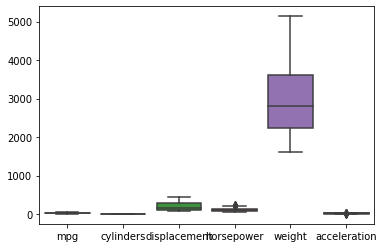

In [142]:
arg_columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration']
sns.boxplot(data = mpg_df[arg_columns])

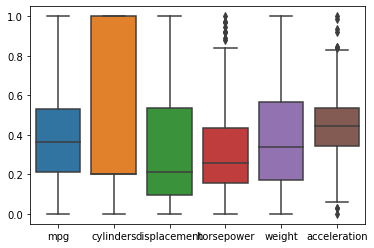

In [143]:
scaler = preprocessing.MinMaxScaler()
mpg_df[arg_columns] = scaler.fit_transform(mpg_df[arg_columns].values.astype(float))
sns.boxplot(data = mpg_df[arg_columns])
plt.show()

#### 4.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [144]:
categorical_columns = [c for c in mpg_df.columns if  mpg_df[c].dtype.name == 'object']
numerical_columns   = [c for c in  mpg_df.columns if  mpg_df[c].dtype.name != 'object']
print (f"Категоиальные признаки: {categorical_columns}")
print (f"Числовые признаки: {numerical_columns}")

Категоиальные признаки: ['car name']
Числовые признаки: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


#### 5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

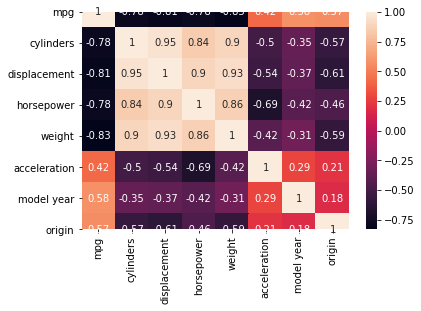

In [145]:
corr = mpg_df.corr()
sns.heatmap(corr, annot = True)

#### 6.Заполните пропущенные значения в данных;

In [146]:
mpg_df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,82,1,ford mustang gl
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,82,2,vw pickup
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,82,1,dodge rampage
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,82,1,ford ranger


#### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

###### 1 – линейная регрессия без использования регуляризаторов

In [147]:
mpg_df = mpg_df.drop(['car name'], axis=1)

In [159]:
x, y = mpg_df.drop(['mpg'], axis=1), mpg_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

reg = LinearRegression()
reg.fit(x_train,  y_train)
val_reg = reg.predict(x_test)
print(pred_reg[:15] - y_test[:15])

220    0.205941
245   -0.362831
134    0.151621
147   -0.061145
390    0.048248
33     0.070706
266   -0.038363
226    0.166048
263    0.219615
327   -0.447185
188    0.245459
273    0.232913
9      0.070330
236   -0.232888
211    0.285352
Name: mpg, dtype: float64


In [160]:

P, p_value_P = pearsonr(val_reg, y_test)
S, p_value_S = spearmanr(val_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.8884450605654508 p_value: 4.870470040757943e-41
Spearmen correlation: 0.920624473853668 p_value: 3.3536629644711317e-49


##### 2 – линейная регрессия, LASSO регуляризатор;

In [163]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
lasso_reg = lasso.predict(X = x_test)
print(pred_reg[:15] - y_test[:15])


220    0.205941
245   -0.362831
134    0.151621
147   -0.061145
390    0.048248
33     0.070706
266   -0.038363
226    0.166048
263    0.219615
327   -0.447185
188    0.245459
273    0.232913
9      0.070330
236   -0.232888
211    0.285352
Name: mpg, dtype: float64


In [164]:
P, p_value_P = pearsonr(lasso_reg , y_test)
S, p_value_S = spearmanr(lasso_reg , y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.5244203255747694 p_value: 1.093704804685951e-09
Spearmen correlation: 0.5097151297529187 p_value: 3.744930177496011e-09
